In [1]:
# seeds for reproducibility // everytime we run neural network generates random values so to prevent that we seed it
import numpy as np
np.random.seed(0)

import random
random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers , models
import seaborn as sns
from sklearn.model_selection import train_test_split

import glob
import cv2

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lakshh21","key":"a2ae428b98ebadf82ed5c18961c17cd0"}'}

In [3]:
kaggle_credentials = json.load(open('/content/kaggle.json'))
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [4]:
!kaggle datasets download -d vuppalaadithyasairam/bone-fracture-detection-using-xrays

Dataset URL: https://www.kaggle.com/datasets/vuppalaadithyasairam/bone-fracture-detection-using-xrays
License(s): unknown
 93% 161M/172M [00:01<00:00, 158MB/s]
100% 172M/172M [00:01<00:00, 129MB/s]


In [5]:
!ls

bone-fracture-detection-using-xrays.zip  kaggle.json  sample_data


In [6]:
# Unzip the downloaded dataset
with ZipFile('/content/bone-fracture-detection-using-xrays.zip', 'r') as zipObj:
   zipObj.extractall()

In [7]:
train_fractured_dir = '/content/archive (6)/train/fractured'
train_not_fractured_dir = '/content/archive (6)/train/not fractured'

val_fractured_dir = '/content/archive (6)/val/fractured'
val_not_fractured_dir = '/content/archive (6)/val/not fractured'

In [ ]:
print(os.listdir(train_fractured_dir)[:5])
print(os.listdir(train_not_fractured_dir)[:5])
print(os.listdir(val_fractured_dir)[:5])
print(os.listdir(val_not_fractured_dir)[:5])

train_fractured_count = len(os.listdir(train_fractured_dir))
train_not_fractured_count = len(os.listdir(train_not_fractured_dir))
val_fractured_count = len(os.listdir(val_fractured_dir))
val_not_fractured_count = len(os.listdir(val_not_fractured_dir))

['13-rotated1-rotated3-rotated3.jpg', '115-rotated1-rotated3-rotated1.jpg', '49-rotated3-rotated2-rotated2.jpg', '108-rotated1-rotated2.jpg', '104-rotated2.jpg']
['13-rotated1-rotated3-rotated3.jpg', '49-rotated3-rotated2-rotated2.jpg', '8-rotated3-rotated2-rotated2-rotated1.jpg', '52-rotated3-rotated2-rotated2-rotated1.jpg', '13-rotated2-rotated3-rotated2-rotated1.jpg']
['4-rotated2-rotated3-rotated1.jpg', '7-rotated3-rotated2-rotated2.jpg', '8-rotated1-rotated3-rotated1.jpg', '4-rotated1-rotated1-rotated3.jpg', '2-rotated2-rotated1.jpg']
['4-rotated1-rotated1-rotated3.jpg', '2-rotated2-rotated1.jpg', '1-rotated1-rotated1-rotated1-rotated1.jpg', '3-rotated2-rotated1-rotated1.jpg', '2-rotated3-rotated2-rotated2-rotated1.jpg']


In [ ]:
train_fractured_count, train_not_fractured_count, val_fractured_count, val_not_fractured_count

(4480, 4383, 360, 240)

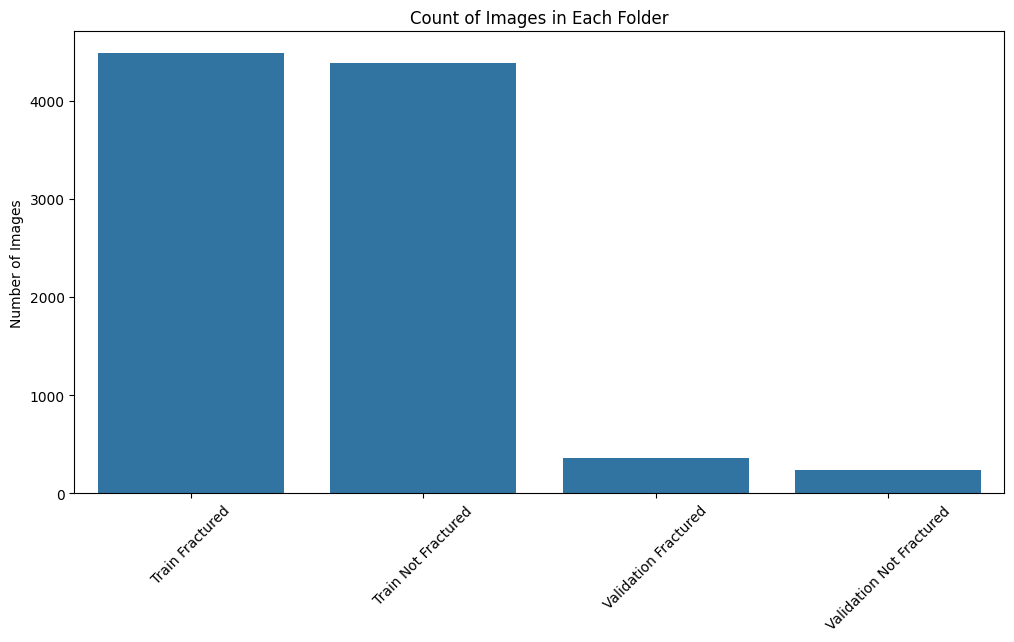

In [ ]:

labels = ['Train Fractured', 'Train Not Fractured', 'Validation Fractured', 'Validation Not Fractured']
counts = [train_fractured_count, train_not_fractured_count, val_fractured_count, val_not_fractured_count]

plt.figure(figsize=(12, 6))
sns.barplot(x=labels, y=counts)
plt.title('Count of Images in Each Folder')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


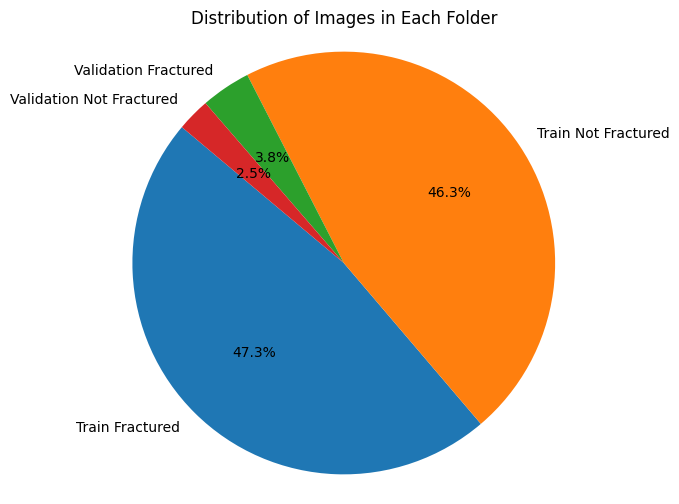

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images in Each Folder')
plt.axis('equal')
plt.show()

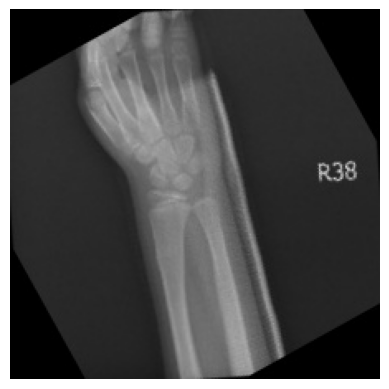

(224, 224, 3)


In [ ]:
img_path = train_fractured_dir + '/' + os.listdir(train_fractured_dir)[0]
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)

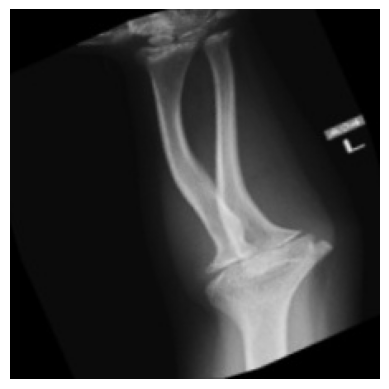

(224, 224, 3)


In [ ]:
img_path = train_not_fractured_dir + '/' + os.listdir(train_not_fractured_dir)[0]
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)

In [ ]:
train_fractured_dir = '/content/archive (6)/train/fractured'
fractured_images = os.listdir(train_fractured_dir)

# Source directory for "not fractured" images
train_not_fractured_dir = '/content/archive (6)/train/not fractured'
not_fractured_images = os.listdir(train_not_fractured_dir)

In [ ]:
df_fractured = pd.DataFrame({
    'filename': [os.path.join(train_fractured_dir, filename) for filename in fractured_images],
    'label': 'fractured'
})

df_not_fractured = pd.DataFrame({
    'filename': [os.path.join(train_not_fractured_dir, filename) for filename in not_fractured_images],
    'label': 'not fractured'
})

# Combine the two DataFrames and reset the index
df = pd.concat([df_fractured, df_not_fractured], axis=0).reset_index(drop=True)

In [ ]:
df.head()

,filename,label
0,/content/archive (6)/train/fractured/13-rotate...,fractured
1,/content/archive (6)/train/fractured/115-rotat...,fractured
2,/content/archive (6)/train/fractured/49-rotate...,fractured
3,/content/archive (6)/train/fractured/108-rotat...,fractured
4,/content/archive (6)/train/fractured/104-rotat...,fractured


In [ ]:
df.tail()

,filename,label
8858,/content/archive (6)/train/not fractured/29-ro...,not fractured
8859,/content/archive (6)/train/not fractured/69-ro...,not fractured
8860,/content/archive (6)/train/not fractured/45-ro...,not fractured
8861,/content/archive (6)/train/not fractured/48-ro...,not fractured
8862,/content/archive (6)/train/not fractured/55-ro...,not fractured


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

# Display the first few rows of the shuffled dataset
df.head()

,filename,label
0,/content/archive (6)/train/not fractured/61-ro...,not fractured
1,/content/archive (6)/train/fractured/27-rotate...,fractured
2,/content/archive (6)/train/not fractured/15-ro...,not fractured
3,/content/archive (6)/train/not fractured/24-ro...,not fractured
4,/content/archive (6)/train/not fractured/29-ro...,not fractured


In [ ]:
df.tail()

,filename,label
8858,/content/archive (6)/train/fractured/23-rotate...,fractured
8859,/content/archive (6)/train/not fractured/28-ro...,not fractured
8860,/content/archive (6)/train/not fractured/47-ro...,not fractured
8861,/content/archive (6)/train/fractured/113-rotat...,fractured
8862,/content/archive (6)/train/fractured/119-rotat...,fractured


In [ ]:
df.to_csv('bone_fracture_dataset.csv', index=False)

In [ ]:
# Splitting data into training and testing
X_train_val, X_test, y_train_val, y_test = train_test_split(df['filename'], df['label'], test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(5982,) (1994,) (887,)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255) #rescaling for training
val_datagen = ImageDataGenerator(rescale=1.0 / 255)  #rescaling for validation
test_datagen = ImageDataGenerator(rescale=1.0 / 255)  #rescaling for testing

# Training Data Generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_train, 'label': y_train}),
    x_col="filename",
    y_col="label",
    target_size=(224, 224),  # Resize images to (224x224) for model compatibility
    batch_size=16,
    color_mode='grayscale',
    class_mode="binary"
)

# Validation Data Generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_val, 'label': y_val}),
    x_col="filename",
    y_col="label",
    target_size=(224, 224),
    batch_size=16,
    class_mode="binary",
    color_mode='grayscale'
)

# Test Data Generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_test, 'label': y_test}),
    x_col="filename",
    y_col="label",
    target_size=(224, 224),
    batch_size=16,
    class_mode="binary",
    color_mode='grayscale',
    shuffle=False  # Keep order for evaluation
)

# Verifying generators
print("Classes:", train_generator.class_indices)

Found 5982 validated image filenames belonging to 2 classes.
Found 1994 validated image filenames belonging to 2 classes.
Found 887 validated image filenames belonging to 2 classes.
Classes: {'fractured': 0, 'not fractured': 1}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,168,513 (42.60 MB)

 Trainable params: 11,168,513 (42.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=5, validation_data=val_generator)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


374/374 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.6379 - loss: 0.6267 - val_accuracy: 0.7773 - val_loss: 0.4939
Epoch 2/5
374/374 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.8012 - loss: 0.4262 - val_accuracy: 0.8811 - val_loss: 0.3229
Epoch 3/5
374/374 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9125 - loss: 0.2477 - val_accuracy: 0.9293 - val_loss: 0.2101
Epoch 4/5
374/374 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9609 - loss: 0.1156 - val_accuracy: 0.9589 - val_loss: 0.1332
Epoch 5/5
374/374 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9827 - loss: 0.0600 - val_accuracy: 0.9659 - val_loss: 0.1232


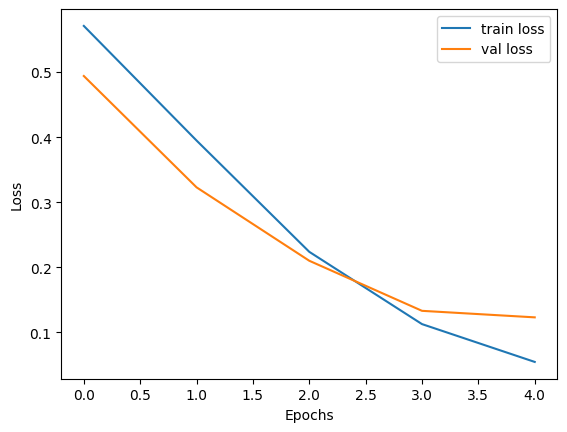

In [ ]:
h = history

# plotting loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

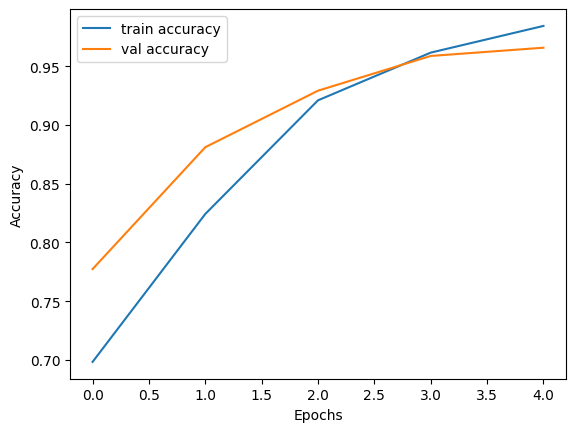

In [ ]:
# plotting accuracy value
plt.plot(h.history['accuracy'],label='train accuracy')
plt.plot(h.history['val_accuracy'],label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
loss , accuracy = model.evaluate(test_generator)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9450 - loss: 0.1697
Test Loss: 0.12667033076286316
Test Accuracy: 0.9560315608978271


In [ ]:
print(model.input_shape)

(None, 224, 224, 1)


In [ ]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert("L")
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0
    return img_array

In [ ]:
image_path = '/content/archive (6)/val/not fractured/1-rotated3-rotated2-rotated1-rotated1.jpg'

proceseed_image = load_and_preprocess_image(image_path)
prediction = model.predict(proceseed_image)[0]

if prediction[0] > 0.5:
  print("Not Fractured")
else:
  print("Fractured")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step
Not Fractured


In [ ]:
model.save('bonefracture_model.h5')